In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("data/station_day.csv")

# Select relevant columns
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
df = df[['City', 'Datetime', 'AQI'] + pollutants]

# Drop missing values
df.dropna(inplace=True)

#  filter one city for better focus (e.g. Delhi)
df = df[df['City'] == 'Delhi']

In [4]:
X = df[pollutants]     # Features: pollutants
y = df['AQI']          # Target: AQI

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [6]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [7]:
def evaluate_model(name, y_test, preds):
    print(f"\n{name} Evaluation:")
    print("R² Score:", r2_score(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)


Linear Regression Evaluation:
R² Score: -0.0018331756011933376
RMSE: 143.60565041187326

Random Forest Evaluation:
R² Score: -0.03106133116259513
RMSE: 145.68541432178958


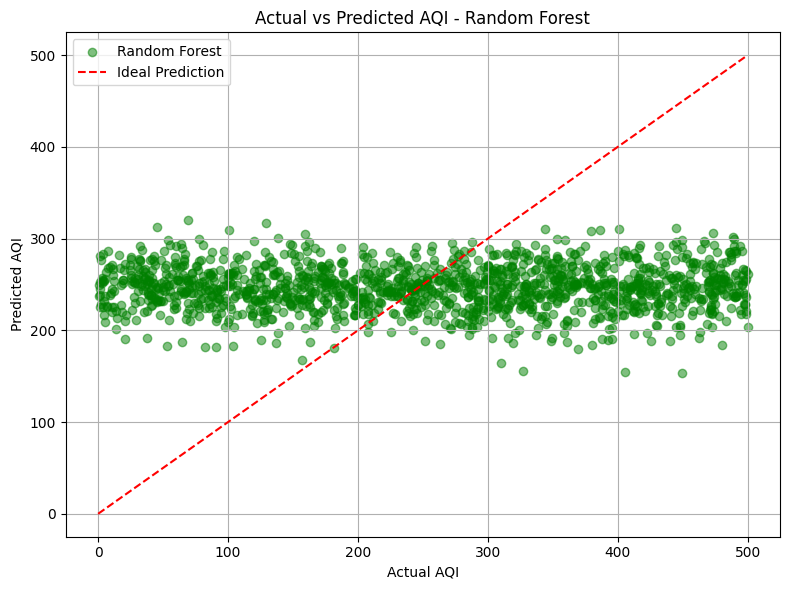

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_preds, alpha=0.5, color='green', label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--',label='Ideal Prediction')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI - Random Forest")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

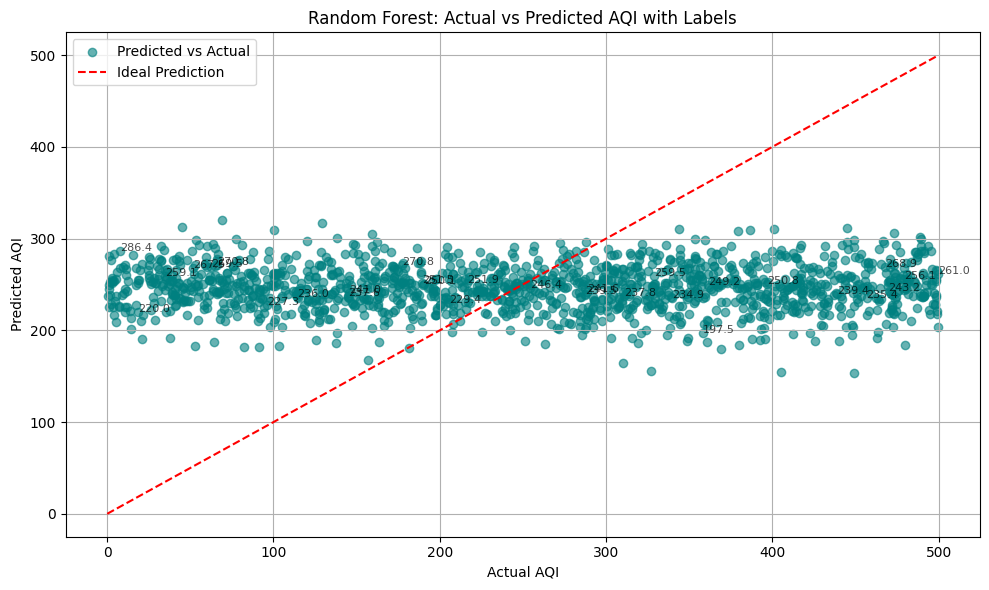

In [9]:
import matplotlib.pyplot as plt

# Limit the number of labels for clarity (show first 30 test points only)
num_labels = 30

plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_preds, alpha=0.6, color='teal', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Prediction')

# Annotate a few points
for i in range(num_labels):
    actual = round(y_test.iloc[i], 1)
    predicted = round(rf_preds[i], 1)
    plt.annotate(f"{predicted}", (y_test.iloc[i], rf_preds[i]), fontsize=8, color='black', alpha=0.7)

plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Random Forest: Actual vs Predicted AQI with Labels")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


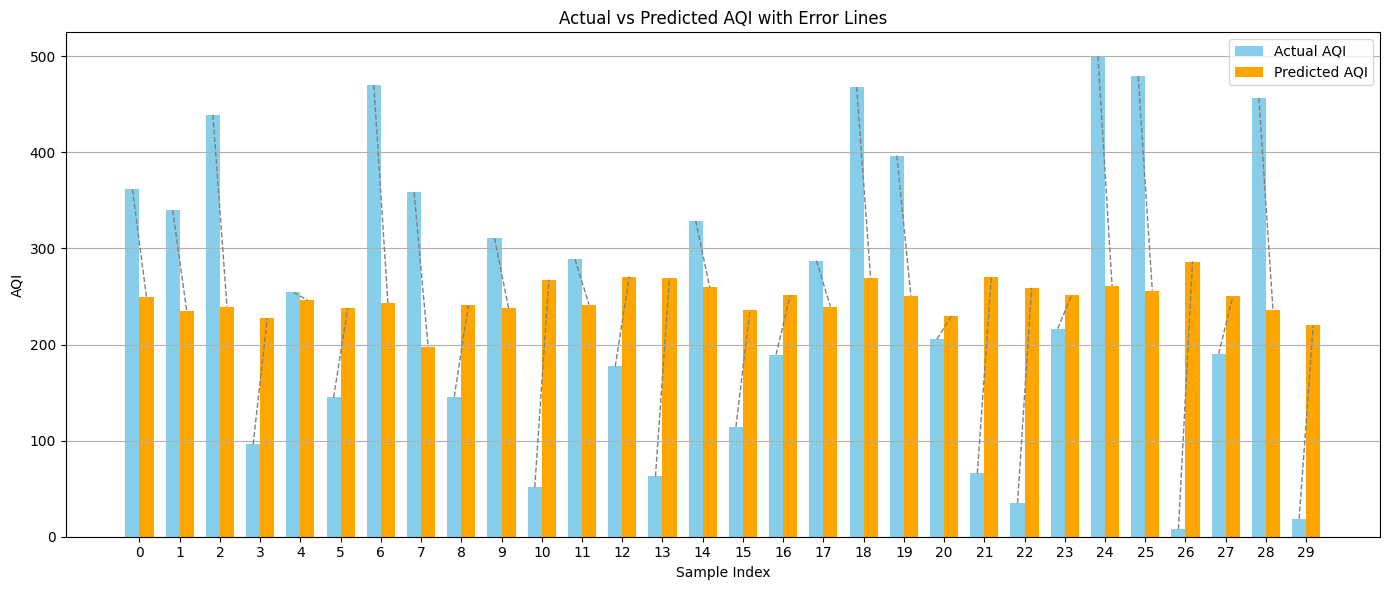

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Number of samples to display
N = 30

# Prepare data for the first N predictions
actual = y_test.iloc[:N].reset_index(drop=True)
predicted = pd.Series(rf_preds[:N])
errors = actual - predicted

# Create a DataFrame for easy plotting
compare_df = pd.DataFrame({
    'Actual AQI': actual,
    'Predicted AQI': predicted,
    'Error': errors
})

# Plot
x = np.arange(N)
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, compare_df['Actual AQI'], width, label='Actual AQI', color='skyblue')
plt.bar(x + width/2, compare_df['Predicted AQI'], width, label='Predicted AQI', color='orange')

# Error line
for i in range(N):
    plt.plot([x[i] - width/2, x[i] + width/2], [actual[i], predicted[i]], color='gray', linestyle='--', linewidth=1)

plt.xlabel("Sample Index")
plt.ylabel("AQI")
plt.title("Actual vs Predicted AQI with Error Lines")
plt.xticks(x)
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()
